In [13]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm_artist.pkl')
data = data.transpose()
data.head()

,Cindy Sherman,Gerhard Richter,Bridget Riley
aajohn,0,1,0
abandon,5,16,21
abashed,0,0,12
abbot,0,16,0
abhor,5,0,0


In [14]:
data['Cindy Sherman'].idxmax()

'sherman'

In [16]:
data['Bridget Riley'].idxmax()

'riley'

In [17]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Cindy Sherman': [('sherman', 2335),
  ('cindy', 1318),
  ('art', 1075),
  ('new', 692),
  ('museum', 682),
  ('work', 634),
  ('artist', 630),
  ('photo', 620),
  ('york', 458),
  ('vuitton', 445),
  ('present', 443),
  ('louis', 439),
  ('film', 434),
  ('studio', 427),
  ('whitney', 373),
  ('like', 370),
  ('photograph', 368),
  ('gala', 363),
  ('annual', 359),
  ('party', 357),
  ('make', 303),
  ('series', 293),
  ('woman', 289),
  ('metro', 262),
  ('gallery', 260),
  ('say', 259),
  ('image', 259),
  ('untitled', 255),
  ('portrait', 248),
  ('courtesy', 237)],
 'Gerhard Richter': [('richter', 2167),
  ('art', 1834),
  ('painting', 1147),
  ('work', 896),
  ('artist', 869),
  ('gerhard', 798),
  ('new', 693),
  ('say', 645),
  ('glass', 584),
  ('window', 550),
  ('make', 536),
  ('museum', 454),
  ('polke', 445),
  ('paint', 404),
  ('world', 400),
  ('photograph', 400),
  ('like', 394),
  ('publish', 387),
  ('image', 383),
  ('german', 345),
  ('year', 321),
  ('painter', 

In [20]:
# Print the top 15 words for each artist
for artist, top_words in top_dict.items():
    print(artist)
    print(', '.join([word for word, count in top_words[0:20]]))
    print('---')

Cindy Sherman
sherman, cindy, art, new, museum, work, artist, photo, york, vuitton, present, louis, film, studio, whitney, like, photograph, gala, annual, party
---
Gerhard Richter
richter, art, painting, work, artist, gerhard, new, say, glass, window, make, museum, polke, paint, world, photograph, like, publish, image, german
---
Bridget Riley
riley, work, art, painting, like, bridget, make, artist, just, gallery, say, think, look, colour, london, thing, ahg, year, way, know
---


In [23]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each artist
words = []
for artist in data.columns:
    top = [word for (word, count) in top_dict[artist]]
    for t in top:
        words.append(t)
        
words

['sherman',
 'cindy',
 'art',
 'new',
 'museum',
 'work',
 'artist',
 'photo',
 'york',
 'vuitton',
 'present',
 'louis',
 'film',
 'studio',
 'whitney',
 'like',
 'photograph',
 'gala',
 'annual',
 'party',
 'make',
 'series',
 'woman',
 'metro',
 'gallery',
 'say',
 'image',
 'untitled',
 'portrait',
 'courtesy',
 'richter',
 'art',
 'painting',
 'work',
 'artist',
 'gerhard',
 'new',
 'say',
 'glass',
 'window',
 'make',
 'museum',
 'polke',
 'paint',
 'world',
 'photograph',
 'like',
 'publish',
 'image',
 'german',
 'year',
 'painter',
 'review',
 'gallery',
 'time',
 'modern',
 'culture',
 'york',
 'light',
 'cologne',
 'riley',
 'work',
 'art',
 'painting',
 'like',
 'bridget',
 'make',
 'artist',
 'just',
 'gallery',
 'say',
 'think',
 'look',
 'colour',
 'london',
 'thing',
 'ahg',
 'year',
 'way',
 'know',
 'paint',
 'twitter',
 'exhibition',
 'facebook',
 'people',
 'use',
 'new',
 'photograph',
 'kind',
 'time']

In [24]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('art', 3),
 ('new', 3),
 ('work', 3),
 ('artist', 3),
 ('like', 3),
 ('photograph', 3),
 ('make', 3),
 ('gallery', 3),
 ('say', 3),
 ('museum', 2),
 ('york', 2),
 ('image', 2),
 ('painting', 2),
 ('paint', 2),
 ('year', 2),
 ('time', 2),
 ('sherman', 1),
 ('cindy', 1),
 ('photo', 1),
 ('vuitton', 1),
 ('present', 1),
 ('louis', 1),
 ('film', 1),
 ('studio', 1),
 ('whitney', 1),
 ('gala', 1),
 ('annual', 1),
 ('party', 1),
 ('series', 1),
 ('woman', 1),
 ('metro', 1),
 ('untitled', 1),
 ('portrait', 1),
 ('courtesy', 1),
 ('richter', 1),
 ('gerhard', 1),
 ('glass', 1),
 ('window', 1),
 ('polke', 1),
 ('world', 1),
 ('publish', 1),
 ('german', 1),
 ('painter', 1),
 ('review', 1),
 ('modern', 1),
 ('culture', 1),
 ('light', 1),
 ('cologne', 1),
 ('riley', 1),
 ('bridget', 1),
 ('just', 1),
 ('think', 1),
 ('look', 1),
 ('colour', 1),
 ('london', 1),
 ('thing', 1),
 ('ahg', 1),
 ('way', 1),
 ('know', 1),
 ('twitter', 1),
 ('exhibition', 1),
 ('facebook', 1),
 ('people', 1),
 ('use', 1),


In [100]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 1]
add_stop_words=['PRON','pron','say','like','cindy', 'sherman','gerhard', 'richter','bridget', 'riley','new','york','twitter','facebook','pinterest','annual']

In [101]:
add_stop_words

['PRON',
 'pron',
 'say',
 'like',
 'cindy',
 'sherman',
 'gerhard',
 'richter',
 'bridget',
 'riley',
 'new',
 'york',
 'twitter',
 'facebook',
 'pinterest',
 'annual']

In [102]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [103]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


In [104]:
wc

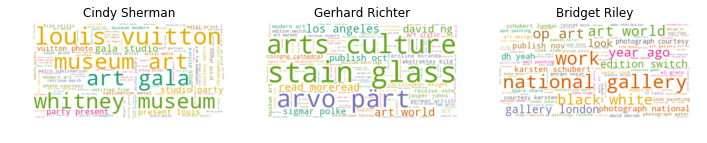

In [105]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Cindy Sherman','Gerhard Richter','Bridget Riley']

# Create subplots for each comedian
for index, artist in enumerate(data.columns):
    wc.generate(data_clean.transcript[artist])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [106]:
# Find the number of unique words that for each artist
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['artist', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,artist,unique_words
0,Cindy Sherman,3904
2,Bridget Riley,4174
1,Gerhard Richter,5589
